<a href="https://colab.research.google.com/github/Lparize/Data-Science/blob/main/An%C3%A1lise_de_Dados_Airbnb_New_Brunswick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à provincia de New  Brunswick no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inLine

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/nb/new-brunswick/2022-12-29/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número id gerado para identificar o imóvel
* name - nome do imóvel anunciado
* host_id - número de id do proprietário do imóvel
* host_name - nome do proprietário
* neighbourdhood_group - nome do grupo de bairro
* neigbourhood - nome do bairro
* latitude - coordenadads latitude do imóvel
* longetide - coordenadas longitude do imóvel
* room_type - tipo de de quarto que é oferecido
* price - preço cobrado
* minimum_nights - mínimo de noites exigido
* number_of_reviews - número de reviews que o imóvel teve
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listing_count - quantidade de imóveis que o mesmo proprietário possui
* availability_365 - número de dias disponível durante 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas, entender a base de dados

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,75065,Bay cottage on Passamaquoddy bay,397069,Bob,Charlotte,Saint Andrews,45.13241,-67.04725,Entire home/apt,258,2,40,2022-09-17,0.44,1,210,9,NaN
1,145013,Lobster Lane Cottage: private beach,642972,Jennifer,Kent,Dundas,46.32857,-64.52445,Entire home/apt,150,7,8,2020-08-23,0.08,1,297,0,NaN
2,261800,Furnished Executive Close to City,1373498,Usha,Saint John,City of Saint John,45.27727,-66.06040,Entire home/apt,125,2,59,2022-08-25,0.73,2,363,11,NaN
3,872640,Acadian Isle Retreat - Heron Haven,2189998,Danielle,Gloucester,Shippagan,47.86785,-64.52187,Entire home/apt,135,7,3,2019-08-18,0.03,1,365,0,NaN
4,950843,"Centrally located 3 bdrm home , bkfst items",3032106,Gerry,Westmorland,Moncton,46.10555,-64.81432,Entire home/apt,174,3,222,2022-11-27,1.95,2,298,19,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Identificar a quantidade de entradas da base de dados e ver os tipos de cada coluna.


In [ ]:
# identificar o volume de dados do DataFrame
print("Entrada:\t{}". format(df.shape[0]))
print("Variáveis:\t{}". format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entrada:	3111
Variáveis:	18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
reviews_per_month                 0.119254
last_review                       0.119254
name                              0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [ ]:
#os valores nulos nas colunas license, reviews e last indetificados não serão significativos para a análise.
df.isnull().sum() / df.shape[1]

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood_group                 0.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        20.611111
reviews_per_month                  20.611111
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           172.833333
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Filtros para as locações de até 600 dólares e até 10 dias de disponibilidade para locação.

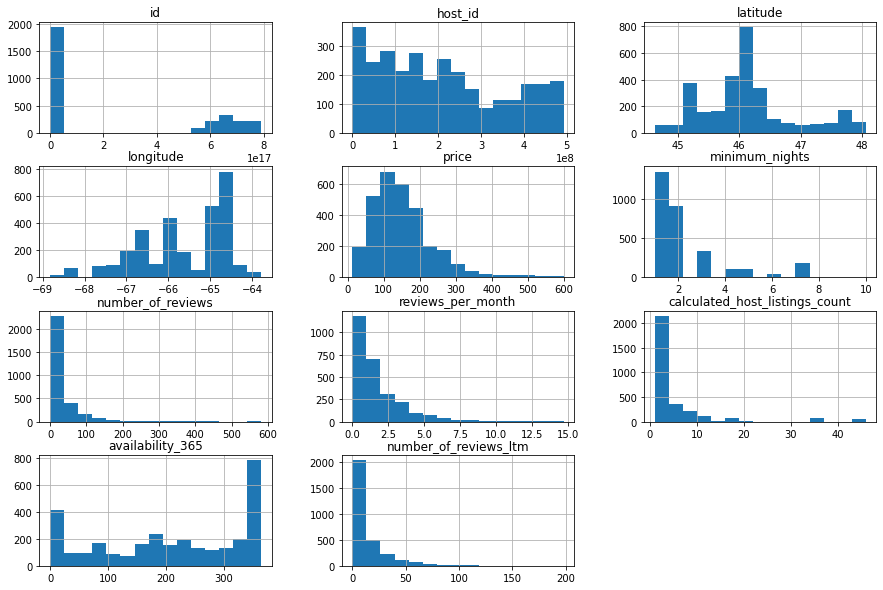

In [ ]:
# plotar o histograma das variáveis numéricas
# Foi excluido o gráfico License, pois estava sem valor.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)

df_clean.drop('license', axis=1, inplace=True)
df_clean.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
media = df["price"].mean()

print(media)

232.66345226615238


A média dos preços por noite é de 232,66 dólares.

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.245166,-0.111181,-0.121920,-0.140920,0.068372
minimum_nights,0.245166,1.000000,-0.174728,-0.299841,-0.194444,-0.113139
number_of_reviews,-0.111181,-0.174728,1.000000,0.538234,-0.077263,0.006689
reviews_per_month,-0.121920,-0.299841,0.538234,1.000000,-0.084464,0.112356
calculated_host_listings_count,-0.140920,-0.194444,-0.077263,-0.084464,1.000000,-0.095259
availability_365,0.068372,-0.113139,0.006689,0.112356,-0.095259,1.000000


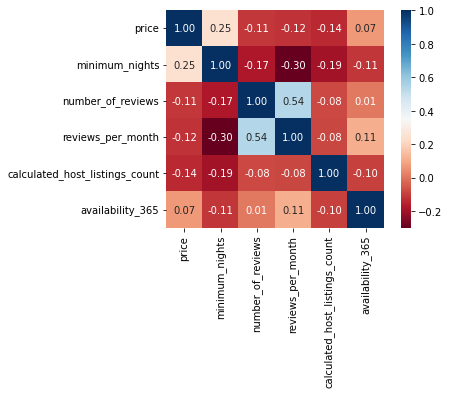

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna Room_type indica o tipo de locação no Airbnb, podendo existir opções de apartamentos/ casas inteiras, quartos privativos e até quartos compartilhados.
Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2364
Private room        655
Shared room           6
Hotel room            3
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.780713
Private room       0.216314
Shared room        0.001982
Hotel room         0.000991
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Dufferin         397.375000
Hampstead        323.000000
Balmoral         296.500000
Hardwicke        273.000000
Musquash         253.000000
Kars             250.333333
Campobello       240.666667
Northesk         237.250000
Saint Croix      231.250000
Kingston         221.571429
Saint David      219.823529
Grand Falls      219.000000
Weldford         217.111111
Riviere-Verte    215.000000
Blackville       211.894737
Name: price, dtype: float64

As maiores locações encontram-se na cidade de Dufferin (397) e Hampstead (323).


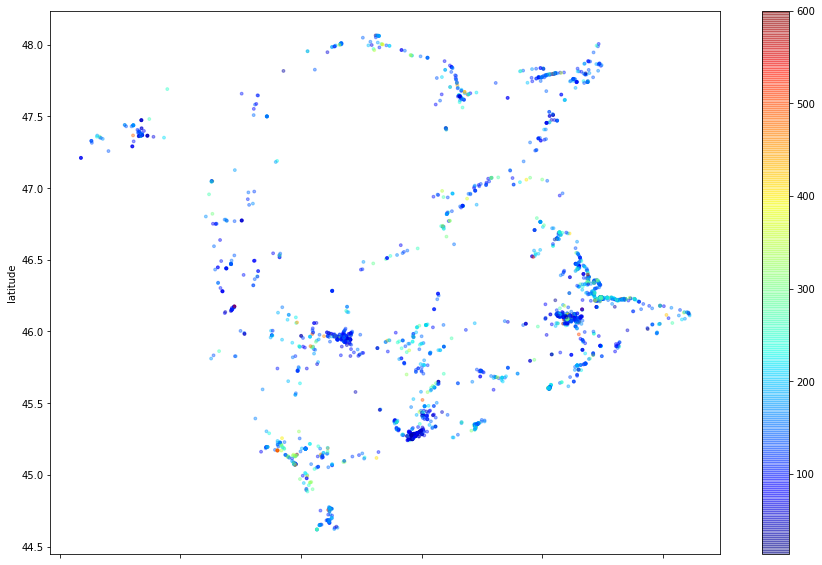

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(15,10));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
media_noite = df["minimum_nights"].mean()

print(media_noite)

2.925104468016715


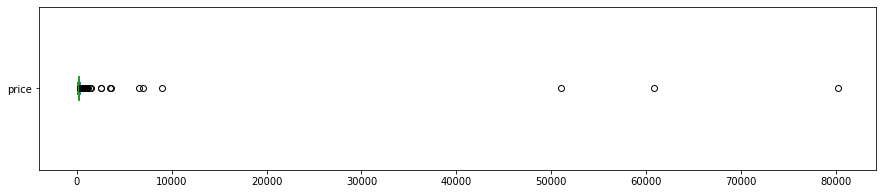


price: valores abaixo de 100 dólares
845 entradas
27.1617%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores abaixo de 100 para price
print("\nprice: valores abaixo de 100 dólares")
print("{} entradas".format(len(df[df.price < 100])))
print("{:.4f}%".format((len(df[df.price < 100]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,500), figsize=(15,3));

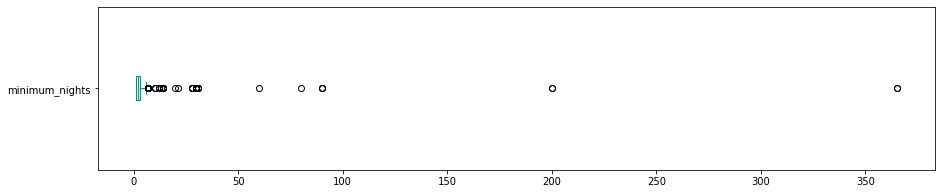

minimum_nights: valores acima de 10:
3065 entradas
98.5214%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores abaixo de 10 dias para minimum_nights
print("minimum_nights: valores acima de 10:")
print("{} entradas".format(len(df[df.minimum_nights < 10])))
print("{:.4f}%".format((len(df[df.minimum_nights < 10]) / df.shape[0])*100))

In [ ]:
# Seleciona as linhas em que o valor da coluna "price" é menor ou igual a 100
df_valores = df.loc[df['price'] <= 100]


print(df_valores)

                      id                                               name  \
10               1489389    Midpoint to  Moncton, Saint John or Fredericton   
11               2148508                   Near Fundy - Country Guest House   
19               3260745  Skyline Resort with Pool, Hot Tub & Tiki Hut! ...   
28               3697522                         The Boathouse on Wegesegum   
31               4549425        NO CLEANING FEES! Cozy 1 Bed. Basement Apt.   
...                  ...                                                ...   
3103  790660894102394342                                       1 Victoria 1   
3104  790664172846087908                                       1 Victoria 2   
3105  790666195871479304                                       1 Victoria 3   
3106  790668338781801509                                       1 Victoria 4   
3108  791175920707039679                   Contemporary 1BR APT near Casino   

        host_id host_name neighbourhood_group      

## Conclusões

A média dos preços de aluguel na província de New Brunswick é de 242 dólares  por noite e a média mínima de noites na região é de 2,92. Há 845 imóveis na região que estão disponíveis por menos de US$100 por noite, o que representa 27% dos imóveis para locação. Se você estiver planejando uma viagem exploratória na região, saiba que há 3065 imóveis que aceitam reservas por até 10 dias.
